# Colab Setup

In [1]:
# Check GPU availability
import torch
torch.cuda.is_available(), torch.cuda.get_device_name(0)


(True, 'NVIDIA A40')

In [2]:
# Remove old clone
# import os, shutil

# repo_name = "ANeurIPS2024_SPV-MIA"
# if os.path.basename(os.getcwd()) == repo_name:
#     %cd ..
# if os.path.exists(repo_name):
#     print(f"Removing existing {repo_name}...")
#     shutil.rmtree(repo_name)

# Clone fork
# !git clone https://github.com/maidesu/ANeurIPS2024_SPV-MIA.git
# %cd ANeurIPS2024_SPV-MIA


In [3]:
# !pip install -q -r requirements-colab.txt

# Target Model Fine-tuning

In [ ]:
import sys
import os

# Get the path to llms_finetune.py
finetune_script_path = "/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/ft_llms/llms_finetune.py"

# Verify the file exists
print(f"Script exists: {os.path.exists(finetune_script_path)}")

model_name = "gpt2"
dataset_name = "wikitext"
dataset_config_name = "wikitext-2-raw-v1"
# Configure arguments as a dictionary

target_args = {
    "output_dir": "./ft_llms/{model_name}/{dataset_name}/target/",
    "block_size": 128,
    "eval_steps": 100,
    "save_epochs": 100,
    "log_steps": 100,
    "dataset_name": dataset_name,
    "model_name": model_name,
    "packing": True,
    "use_dataset_cache": True,
    "epochs": 2,
    "batch_size": 2,
    "learning_rate": 1e-4,
    "gradient_accumulation_steps": 1,
    "train_sta_idx": 0,
    "train_end_idx": 2000,
    "eval_sta_idx": 0,
    "eval_end_idx": 500,
    "dataset_config_name": dataset_config_name,
    "disable_flash_attention": True  # Added to avoid flash attention issues
}

# Import the function
sys.path.append(os.path.dirname(finetune_script_path))
from llms_finetune import main_llms_finetune

# Run the fine-tuning with the dictionary arguments
main_llms_finetune(target_args)

# Launch fine-tuning test using gpt2 and small wikitext-2-raw-v1 slice
# !accelerate launch ./ft_llms/llms_finetune.py \
# --output_dir ./ft_llms/gpt2/wikitext/target/ \
# --block_size 128 --eval_steps 100 --save_epochs 100 --log_steps 100 \
# -d wikitext -m gpt2 --packing --use_dataset_cache \
# -e 2 -b 2 -lr 1e-4 --gradient_accumulation_steps 1 \
# --train_sta_idx=0 --train_end_idx=2000 --eval_sta_idx=0 --eval_end_idx=500 \
# --dataset_config_name wikitext-2-raw-v1


Script exists: True


/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


full_path='/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/project'


/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


trainable params: 2359296 || all params: 126799104 || trainable%: 1.8606566809809635
Folder './cache/wikitext/wikitext-2-raw-v1' already exists.


Using pad_token, but it is not set yet.
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/trl/trainer/sft_trainer.py:166: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(
Map: 100%|██████████| 500/500 [00:00<00:00, 7987.20 examples/s]
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss
100,4.230400,3.836797
200,4.078800,3.765302


KeyboardInterrupt: 

# Self-prompt Reference Model Fine-tuning

In [ ]:
import sys
import os

# Get the path to refer_data_generate.py
refer_data_script_path = "/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/ft_llms/refer_data_generate.py"

# Verify the file exists
print(f"Script exists: {os.path.exists(refer_data_script_path)}")

# Configure arguments as a dictionary
refer_data_args = {
    "model_name": model_name,
    "target_model": "./ft_llms/{model_name}/{dataset_name}/target",
    "dataset_name": dataset_name,
    "dataset_config_name": dataset_config_name,
    "cache_path": "./cache",
    "use_dataset_cache": True,
    "packing": True,
    "block_size": 128,
    "preprocessing_num_workers": 1,
    "validation_split_percentage": 0.1,
    "local_files_only": False
}

# Import the function
sys.path.append(os.path.dirname(refer_data_script_path))
from refer_data_generate import run_data_generation

# Run the data generation with the dictionary arguments
run_data_generation(refer_data_args)





# !accelerate launch ./ft_llms/refer_data_generate.py \
# -tm ./ft_llms/gpt2/wikitext/target/checkpoint-2000 \
# -m gpt2 -d wikitext \
# --dataset_config_name wikitext-2-raw-v1


Script exists: True
Running with arguments: <src.parser.Args object at 0x7f6b30211450>
Using device: cuda


/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading model from: ./ft_llms/gpt2/wikitext/target/checkpoint-2000
Pad token id is None, setting to eos token id...
Preparing datasets...
Folder './cache/wikitext/wikitext-2-raw-v1' already exists.
Train dataset size: 16585
Generating texts...


  0%|          | 0/6585 [00:00<?, ?it/s]/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/transformers/generation/utils.py:1421: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  0%|          | 1/6585 [00:04<8:03:14,  4.40s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results

Sample generated text:  lowest bid. 
 The city of Las Vegas had lobbied hard to be the next city to legalize recreational m...


  0%|          | 2/6585 [00:06<5:04:02,  2.77s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  0%|          | 3/6585 [00:07<3:57:14,  2.16s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  0%|          | 4/6585 [00:08<3:25:13,  1.87s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  0%|          | 5/6585 [00:10<3:07:26,  1.71s/it]The attention mask and the pad token id were no

KeyboardInterrupt: 

In [ ]:
# Check if the reference data directory exists
# !ls -la ./cache/wikitext/wikitext-2-raw-v1/

total 10604
drwxr-xr-x 5 liranc6 domain^users    4096 May 13 19:31 .
drwxr-xr-x 3 liranc6 domain^users    4096 May 13 17:21 ..
drwxr-xr-x 3 liranc6 domain^users    4096 May 13 18:42 attack_data_gpt2@wikitext
drwxr-xr-x 3 liranc6 domain^users    4096 May 13 18:13 refer@gpt2
drwxr-xr-x 3 liranc6 domain^users    4096 May 13 19:31 refer@tiiuae
-rw-r--r-- 1 liranc6 domain^users 9690328 May 13 17:21 train_dataset
-rw-r--r-- 1 liranc6 domain^users 1093224 May 13 17:22 valid_dataset


In [ ]:
import os
import sys

# Get the path to llms_finetune.py
finetune_script_path = "/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/ft_llms/llms_finetune.py"

# Verify the file exists
print(f"Script exists: {os.path.exists(finetune_script_path)}")

# Configure reference model arguments as a dictionary
reference_args = {
    "refer": True,
    "output_dir": f"./ft_llms/{model_name}/{dataset_name}/refer/",
    "block_size": 128,
    "eval_steps": 100,
    "save_epochs": 100,
    "log_steps": 100,
    "dataset_name": dataset_name,
    "model_name": model_name,
    "packing": True,
    "use_dataset_cache": True,
    "epochs": 2,
    "batch_size": 2,
    "learning_rate": 5e-5,
    "gradient_accumulation_steps": 1,
    "train_sta_idx": 0,
    "train_end_idx": 2000,
    "eval_sta_idx": 0,
    "eval_end_idx": 500,
    "dataset_config_name": dataset_config_name,
    "disable_flash_attention": True  # Added to avoid flash attention issues
}

# Import the function if not already imported
if 'main_llms_finetune' not in globals():
    sys.path.append(os.path.dirname(finetune_script_path))
    from llms_finetune import main_llms_finetune

# Run reference model fine-tuning
main_llms_finetune(reference_args)

# !accelerate launch ./ft_llms/llms_finetune.py --refer \
# --output_dir ./ft_llms/gpt2/wikitext/refer/ \
# --block_size 128 --eval_steps 100 --save_epochs 100 --log_steps 100 \
# -d wikitext -m gpt2 --packing --use_dataset_cache \
# -e 2 -b 2 -lr 5e-5 --gradient_accumulation_steps 1 \
# --train_sta_idx=0 --train_end_idx=2000 --eval_sta_idx=0 --eval_end_idx=500 \
# --dataset_config_name wikitext-2-raw-v1

Script exists: True


/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


trainable params: 2359296 || all params: 126799104 || trainable%: 1.8606566809809635
Folder './cache/wikitext/wikitext-2-raw-v1' already exists.


Using pad_token, but it is not set yet.
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/trl/trainer/sft_trainer.py:166: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(
Map: 100%|██████████| 500/500 [00:00<00:00, 8169.69 examples/s]
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss


# Run SPV-MIA

In [ ]:
# Add this to a cell in your notebook:
# import os
# os.environ["TOKENIZERS_PARALLELISM"] = "false"  # Avoid huggingface tokenizer warnings

# Install a compatible version of NLTK for Python 3.11
# !pip install -q nltk==3.8.1

# Download necessary NLTK data
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

print("Environment ready for attack script")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[nltk_data] Downloading package wordnet to /home/liranc6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/liranc6/nltk_data...


Environment ready for attack script


[nltk_data]   Package omw-1.4 is already up-to-date!


In [1]:
import sys
import os

# Get the path to attack.py
attack_script_path = "/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/run_attack.py"

# Verify the file exists
print(f"Script exists: {os.path.exists(attack_script_path)}")

# Import the attack function
sys.path.append(os.path.dirname(attack_script_path))
from run_attack import run_attack  # Adjust if the function has a different name

model_name = "gpt2"
dataset_name = "wikitext"
dataset_config_name = "wikitext-2-raw-v1"

attack_args = {
    "model_name": model_name,
    "dataset_name": dataset_name,
    "dataset_config_name": dataset_config_name,
    "target_model": f"./ft_llms/{model_name}/{dataset_name}/target/",
    "reference_model": f"./ft_llms/{model_name}/{dataset_name}/refer/",
    }

# Run the attack with dictionary arguments
run_attack(attack_args)

# # Import directly from the module file 
# from attack import run_attack as run_attack_func  # Rename to avoid potential conflicts

# run_attack_func()

# !python attack.py

Script exists: True


/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


full_path='/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/project'


/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/transformers/modeling_utils.py:484: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unles

Folder './cache/wikitext/wikitext-2-raw-v1' already exists.


05/14/2025 19:22:38 - INFO - attack.attack_model - Preparing data...
05/14/2025 19:22:38 - INFO - attack.attack_model - Generating feature vectors for member data...
  0%|          | 0/1 [00:00<?, ?it/s]/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


100%|██████████| 1/1 [04:12<00:00, 252.77s/it]
05/14/2025 19:26:51 - INFO - attack.attack_model - Generating feature vectors for non-member data...
  0%|          | 0/1 [00:59<?, ?it/s]


KeyboardInterrupt: 

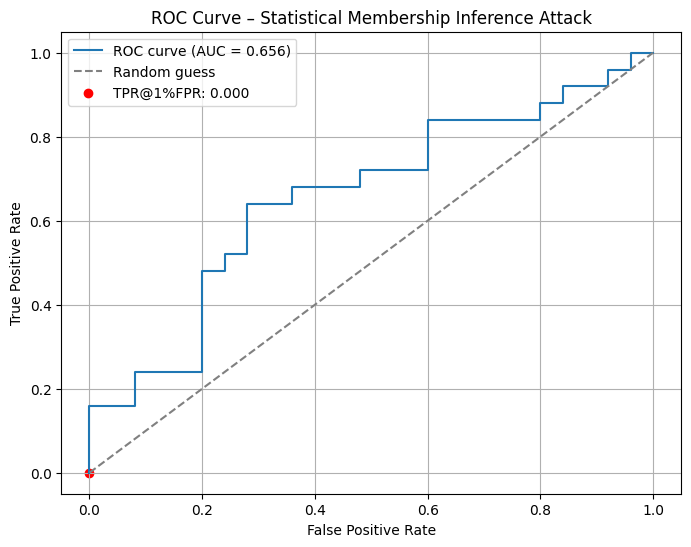

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load ROC curve data
data = np.load("./cache/wikitext/wikitext-2-raw-v1/attack_data_gpt2@wikitext/roc_stat.npz")
fpr = data["fpr"]
tpr = data["tpr"]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {np.round(np.trapz(tpr, fpr), 4)})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Statistical Membership Inference Attack")
plt.legend()
plt.grid(True)

# Mark TPR@1%FPR
fpr_1_index = np.argmin(np.abs(fpr - 0.01))
plt.scatter(fpr[fpr_1_index], tpr[fpr_1_index], color='red', label=f'TPR@1%FPR: {tpr[fpr_1_index]:.3f}')
plt.legend()

# Save the figure
plt.savefig("roc_stat.png", dpi=300)
plt.show()
